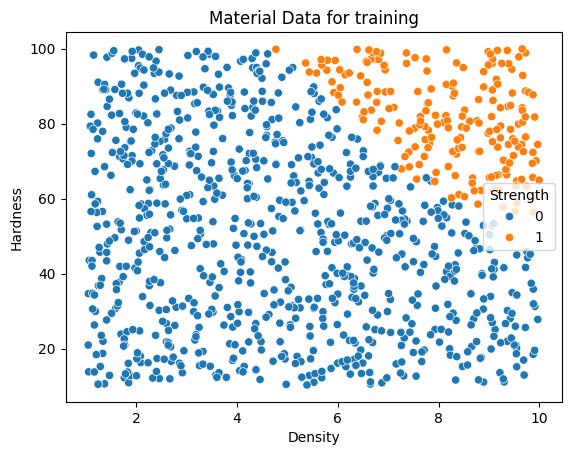

c:\Users\William\anaconda3\envs\ASTRAGUI\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


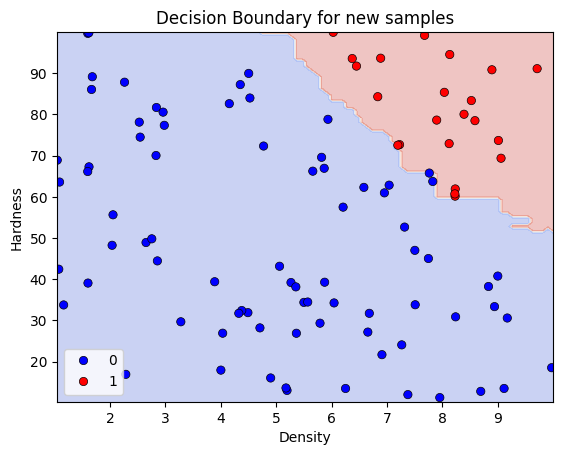

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Generating synthetic data
n_samples = 1000
density = np.random.uniform(1.0, 10.0, n_samples)
hardness = np.random.uniform(10.0, 100.0, n_samples)
strength = (density * hardness + np.random.normal(0, 10, n_samples)) > 500  # Arbitrary threshold

# Create a DataFrame
data = pd.DataFrame({
    'Density': density,
    'Hardness': hardness,
    'Strength': strength.astype(int)
})

# Visualize the data
sns.scatterplot(data=data, x='Density', y='Hardness', hue='Strength')
plt.title('Material Data for training')
plt.show()

# Splitting the data into training and testing sets
X = data[['Density', 'Hardness']]
y = data['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Generating synthetic data for prediction
n_samples_pred = 100
density_pred = np.random.uniform(1.0, 10.0, n_samples_pred)
hardness_pred = np.random.uniform(10.0, 100.0, n_samples_pred)

# Create a DataFrame for prediction
data_pred = pd.DataFrame({
    'Density': density_pred,
    'Hardness': hardness_pred,
})

# Standardizing the features for prediction
X_pred = data_pred[['Density', 'Hardness']]
X_pred = scaler.transform(X_pred)

# Predicting the test set results
y_pred = clf.predict(X_pred)

# Create a meshgrid in the original feature space
xx, yy = np.meshgrid(np.linspace(X['Density'].min(), X['Density'].max(), 100),
                     np.linspace(X['Hardness'].min(), X['Hardness'].max(), 100))

# Flatten the meshgrid and standardize the features
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_standardized = scaler.transform(grid_points)

# Predict the class labels for each point in the meshgrid
Z = clf.predict(grid_points_standardized)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(data=data_pred, x='Density', y='Hardness', hue=y_pred, edgecolor='k', palette={0: 'blue', 1: 'red'})
plt.xlabel('Density')
plt.ylabel('Hardness')
plt.title('Decision Boundary for new samples')
plt.show()
